In [9]:
import sys
print("Python:{}".format(sys.version))
import scipy
print("Scipy:{}".format(scipy.__version__))
import numpy
print("Numpy:{}".format(numpy.__version__))
import matplotlib
print("MatPlot:{}".format(matplotlib.__version__))
import pandas
print("Pandas:{}".format(pandas.__version__))
import sklearn
print("Sklearn:{}".format(sklearn.__version__))

Python:3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]
Scipy:1.11.2
Numpy:1.25.2
MatPlot:3.7.2
Pandas:2.0.3
Sklearn:1.3.0


In [20]:
# importing dependecies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split #sklearn.corss_validation is old code which isnt working for this...
%matplotlib inline



In [21]:
#using pandas to read the database stored in the same folder
data = pd.read_csv('mnist_test.csv')

In [22]:
#viewing column heads
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#exctracting daa from the dataset and viewing them up close
a=data.iloc[3,1:].values

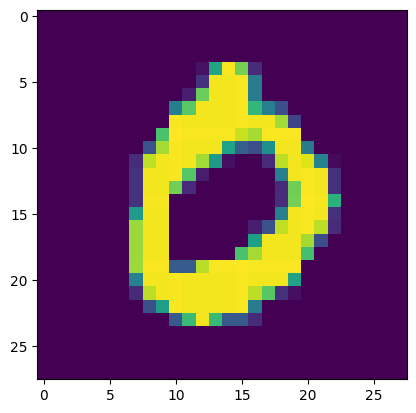

In [24]:
#reshaping the extarcted data into a reasonable size
a=a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [25]:
# preparing the data
#separating labels and the data values
df_x=data.iloc[:,1:]
df_y=data.iloc[:,0]


In [32]:
#creating test and train size/batches
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [27]:
#check data
x_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
4983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#check data
x_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
4983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# call rf classifier
rf=RandomForestClassifier(n_estimators=100)

In [33]:
# fit the model
rf.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
#prediction on test data
pred=rf.predict(x_test)

In [35]:
pred

array([1, 3, 7, ..., 0, 1, 0], dtype=int64)

In [36]:
#check prediction accuracy
s=y_test.values

#Calculate he number of correclty predicted values
count=0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count=count+1
        

In [37]:
count

1889

In [38]:
#total values that the prediction code was run on
len(pred)

2000

In [40]:
# accuracy value
1889/2000

0.9445